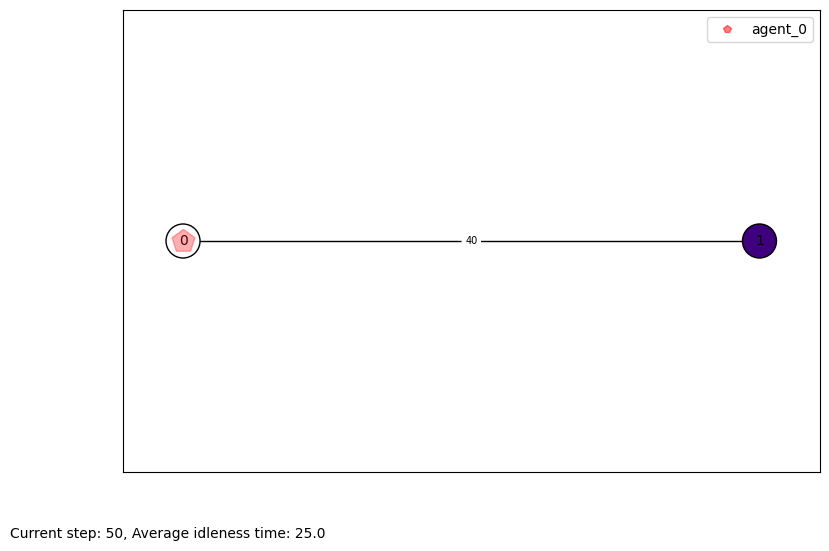

In [43]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/2nodes.graph")
env = parallel_env(patrolGraph, 1,
                #    observation_radius = 0,
                #    comms_model = CommunicationModel("bernoulli"),
                   require_explicit_visit=True
)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
# actions = {agent: env.action_space(agent).sample() for agent in env.agents}
actions = {agent: 1 for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()#figsize=(8,6))

    # actions = {agent: 0 for agent in env.agents}
    i += 1
    if i >= 50:
        break
env.close()

In [44]:
env.observe(env.agents[0])

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x1cd02086020>: (30.0,
   25.0)},
 'vertex_state': {0: 0, 1: 50.0},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x1cd02086020>: array([ 0, 40])}}

In [45]:
env.observe_with_communication(env.agents[0])

{'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x1cd02086020>: (30.0,
   25.0)},
 'vertex_state': {0: 0, 1: 50.0},
 'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x1cd02086020>: array([ 0, 40])}}